## Support Vector Machines (SVM)

### Descripción

Las máquinas de vector soporte (support vector machines, SVM en inglés) son un conjunto de algoritmos utilizados para el aprendizaje supervisados. Su caso de uso típico es clasificación, pero también existen implementaciones para regresión.

La base del algoritmo es definir un **hiperplano** que separe las muestras de manera que se **maximice el margen entre las muestras** de distintas clases.
Las muestras que quedan en el margen son las denominadas **vector soporte**.

Las nuevas muestras serán por tanto clasificadas en función del lado en que queden con respecto al hiperplano definido en el entrenamiento.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/926px-SVM_margin.png" width="300px"></img>

La __función de coste__ que se intenta minimizar en el entrenamiento es una aproximación linear de la función de coste de una regresión logística, y se puede expresar de la siguiente manera:

$L(\theta_i) = \sum y_i \max(0, 1 - \theta_ix) + (1 - y_i) max(0, 1 + \theta_ix)$

Generalmente además del coste por clasificación, se añade un término de __regularización__ que se controla mediante el parámetro $C$.

$L(\theta_i) = C \sum y_i \max(0, 1 - \theta_ix) + (1 - y_i) max(0, 1 + \theta_ix) + \frac{1}{2} \sum \theta_i^2$

El factor C multiplica al error por clasificación por lo que cuanto mayor es su valor menos regularizado queda el modelo, es decir, más tendencia al overfit tiene el modelo pero más poder de aprendizaje.

Los valores típicos del parámetro C suelen estar desde 0.1 hasta 100.

### Kernel trick

El algoritmo básico de las máquinas de vector soporte, como hemos visto, es lineal, es decir la __frontera de decisión__ que define sólo puede formar una __linea recta__.

Para poder clasificar datos que no pueden ser separados linealmente, como los del ejemplo de la imagen, se utiliza una técnica denominada *kernel trick*.


<img src="https://miro.medium.com/max/1676/1*mCwnu5kXot6buL7jeIafqQ.png" width="500px"></img>

Con este método el espacio original de las variables es mapeado a un espacio de dimensionalidad mayor, dónde las muestras pueden ser separadas por un hiperplano lineal. Cuando representemos la frontera en el espacio original, esta frontera de decisión ya no será lineal.

Esto se puede conseguir con distintas proyecciones pero las más comunes son el kernel polinímico y el kernel radial gaussiano.

#### Linear kernel

Cuando no se hace ningun mapeo se denomina *kernel lineal* y, como hemos visto, la frontera de decisión es lineal.

<img width = "300px" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_001.png"></img>

#### Polynomial Kernel

El kernel polinómico realiza un aumento dimensional mapeando cada par de muestras con una transformación polinómica de grado $d$.

$k(x_i, x_j) = (x_i x_j)^d$

<img width = "300px" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_002.png"></img>

#### Radial basis function kernel (rbf)

$k(x_i, x_j) = \gamma \exp(||x_i x_j ||^2)$

<img width = "300px" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_003.png"></img>

El parametro $\gamma$ controla el radio de influencia del kernel en cada muestra. A mayor valor de $gamma$ el modelo tiende al overfit. Si $gamma$ es muy pequeño el modelo puede sufrir problemas para representar correctamente la forma de los datos.

### Ejemplo de utilización

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Plotting de la frontera de decision

def plot_decision(ax, estimator, min_x, max_x, min_y, max_y, num = 100):
  """ Pinta la frontera de decisión de una clasificación en matplotlib.
  Args:
    ax (Axes): Objeto Axes de matplotlib.
    estimator (Estimator): Estimador de clasificación de sklearn.
    min_x (float): Mínimo valor de x que estimar.
    max_x (float): Máximo valor de x que estimar.
    min_y (float): Mínimo valor de y que estimar.
    max_y (float): Máximo valor de y que estimar.
    num (int): Número de muestras para el grid.
  """
  xx = np.linspace(min_x, max_x, num = num)
  yy = np.linspace(min_y, max_y, num = num)
  # 2d grid
  xx, yy = np.meshgrid(xx, yy)
  # np.ravel: Return a contiguous flattened array.
  # np.c_: Translates slice objects to concatenation along the second axis.
  Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha = 0.4)

Para realizar el ejemplo vamos a utilizar el dataset `breast_cancer` del módulo `sklearn.datasets` de scikit learn.

Cada instancia del dataset representa ciertas características de un tumor, y el objetivo es clasificar si el tumor es benigno o maligno.

In [ ]:
def bunch_to_dataframe(dataset, target_name = "target"):
  """ Utilidad para transformar un objeto 'Bunch' en dataframe.
  """
  df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
  df[target_name] = dataset.target_names[dataset.target]
  return df

In [ ]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
df = bunch_to_dataframe(dataset, "type")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


Para ilustrar los conceptos que hemos visto vamos a utlizar únicamente las dos primeras características, lo que nos permitirá visualizar las fronteras de decisión para cada kernel.

In [ ]:
def plot_dataset(svc, ax):
  """
  """
  plot_decision(ax, svc, 0, 35, 0, 40)

  for target in (0, 1):

    ax.set_xlabel(dataset.feature_names[0])
    ax.set_ylabel(dataset.feature_names[1])
    ax.scatter(
        X[:, 0][y == target], X[:, 1][y == target],
        label = dataset.target_names[target], s = 50, alpha = 0.3
    )

In [ ]:
from sklearn.svm import SVC

X = dataset.data[:, :2]
y = dataset.target

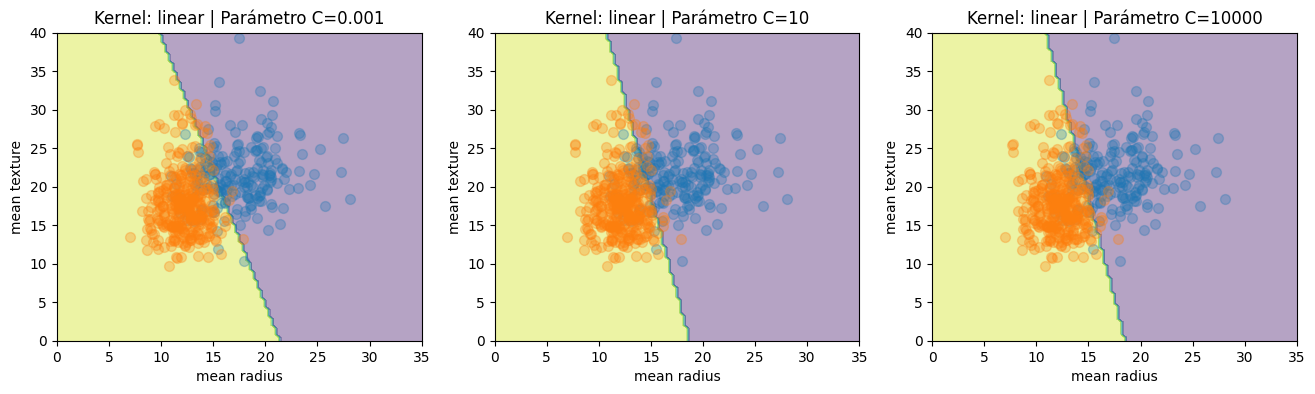

In [ ]:
# Kernel Lineal

parameters = [1e-3, 10, 10000]

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

kernel = 'linear'

for C, ax in zip(parameters, axes):
  svc = SVC(kernel=kernel, C = C).fit(X, y)
  ax.set_title(f"Kernel: {kernel} | Parámetro C={C}")
  plot_dataset(svc, ax)


In [ ]:
# Ejemplo sobre como funciona zip

lista1 = ["A", "B", "C"]
lista2 = [1, 2, 3]

for item1, item2 in zip(lista1, lista2):
    print(item1, item2)

A 1
B 2
C 3


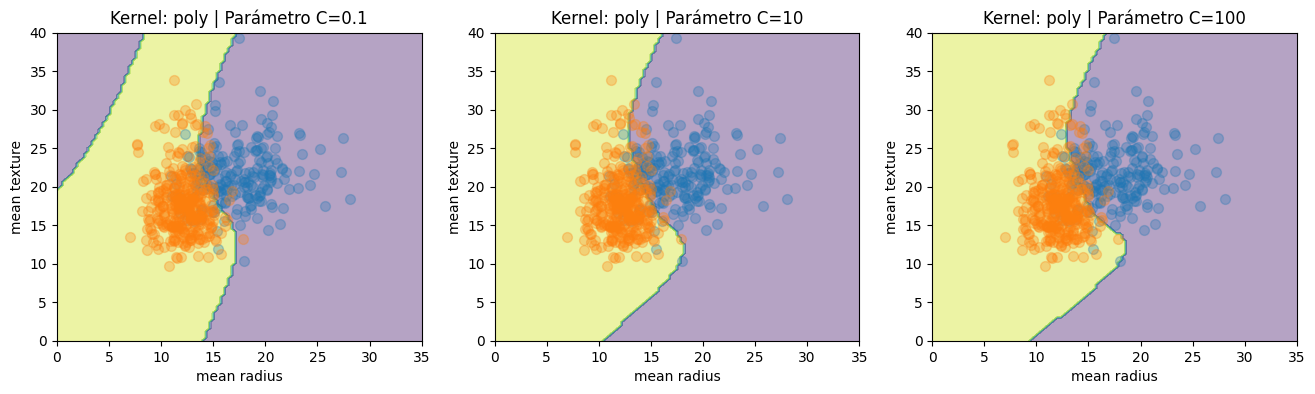

In [ ]:
# Kernel Polinomial

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

parameters = [0.1, 10, 100]
kernel = 'poly'

for C, ax in zip(parameters, axes):
  # degree = Degree of the polynomial kernel function
  svc = SVC(kernel=kernel, C = C, degree=5).fit(X, y)
  ax.set_title(f"Kernel: {kernel} | Parámetro C={C}")
  plot_dataset(svc, ax)

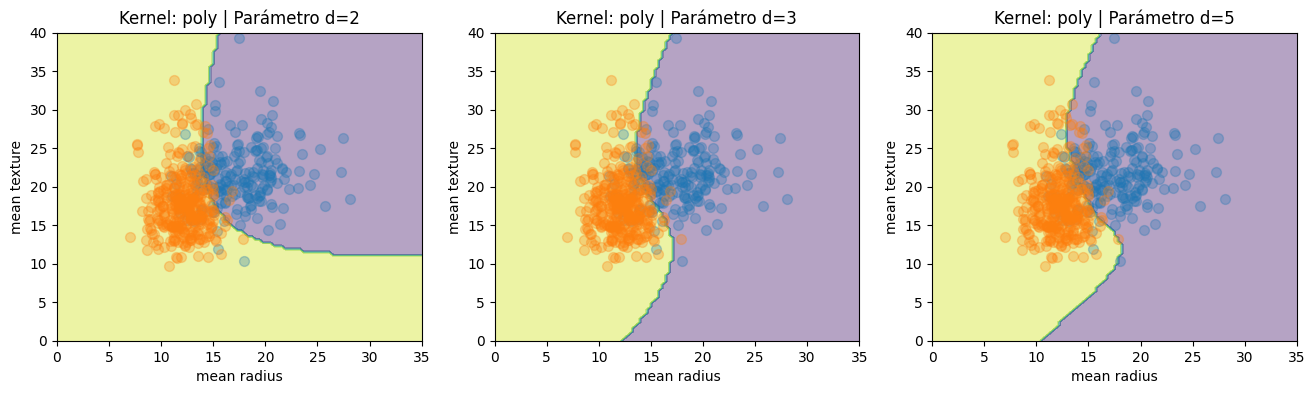

In [ ]:
# Kernel Polinomial con diferentes grados

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

parameters = [2, 3, 5]
kernel = 'poly'
for d, ax in zip(parameters, axes):
  svc = SVC(kernel=kernel, C = 10, degree=d).fit(X, y)
  ax.set_title(f"Kernel: {kernel} | Parámetro d={d}")
  plot_dataset(svc, ax)

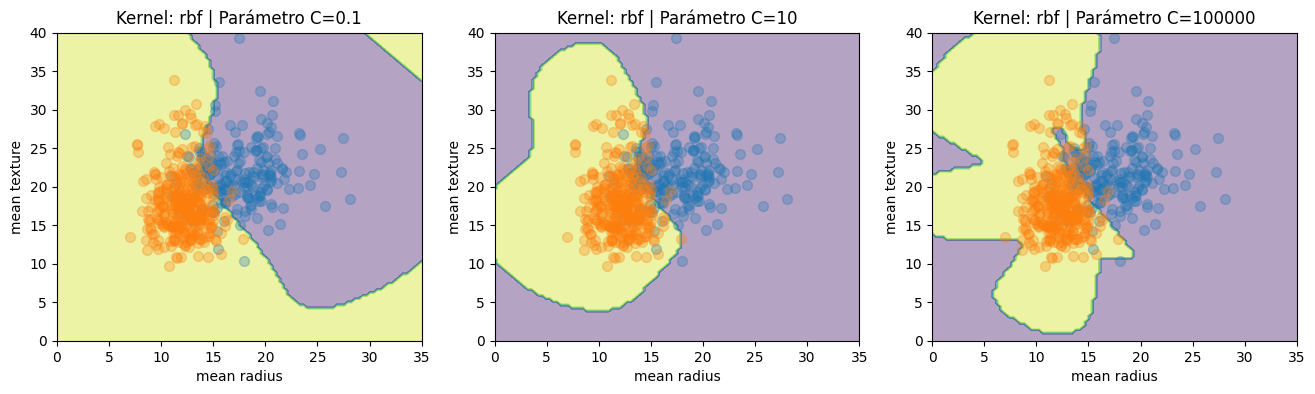

In [ ]:
# Kernel rfb = radial basis function con diferentes C

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

parameters = [0.1, 10, 100000]
kernel = 'rbf'
for C, ax in zip(parameters, axes):
  svc = SVC(kernel=kernel, C = C).fit(X, y)
  ax.set_title(f"Kernel: {kernel} | Parámetro C={C}")
  plot_dataset(svc, ax)

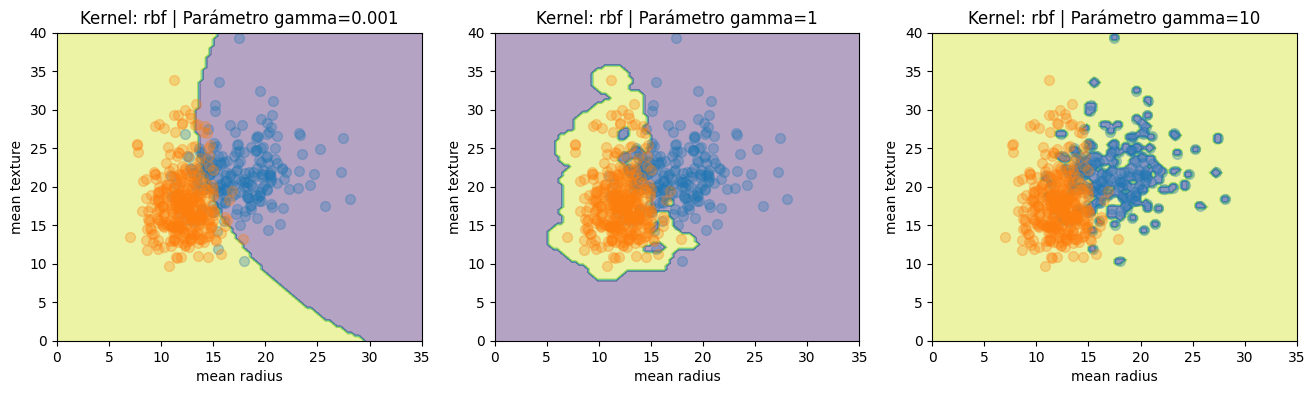

In [ ]:
# Kernel rfb = radial basis function con diferentes gamma

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

parameters = [0.001, 1, 10]
kernel = 'rbf'
for g, ax in zip(parameters, axes):
  svc = SVC(kernel=kernel, C = 10, gamma = g).fit(X, y)
  ax.set_title(f"Kernel: {kernel} | Parámetro gamma={g}")
  plot_dataset(svc, ax)

# EJERCICIO SVC
Utilizando todas las variables disponibles en el dataset `breast_cancer`:
  - Dividir el dataset en sets de *train* y *test*.
  - Normalizar las variables de entrada. (Para ello se puede utilizar el transformador `sklearn.preprocessing.MinMaxScaler`)
  - Entrenar tres algoritmos *SVM* utilizando los kernels que hemos visto, ajustando los hiperparámetros para obtener el clasificador más preciso en cada caso.
  - ¿Qué kernel funciona mejor? ¿Cuáles pueden ser las razones?


In [ ]:
# TODO